In [2]:
from sklearn.datasets import make_classification

In [4]:
x,y = make_classification(n_samples=1000,n_features=10,n_informative=3,n_classes=3,random_state=42)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(multi_class='ovr')
logistic_regression.fit(x_train,y_train)

/Users/bhaskarrai/Desktop/100-days-/day_67/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'ovr'


In [10]:
y_pred = logistic_regression.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix
score = accuracy_score(y_test,y_pred)
conf = confusion_matrix(y_test,y_pred)
print(score)
print(conf)

0.68
[[79 16  8]
 [31 38 27]
 [ 3 11 87]]


## Logistic regression for imbalance datasets

In [19]:
from collections import Counter
from sklearn.datasets import make_classification

In [22]:
x,y = make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,n_redundant=0,weights=[0.99],random_state=10)

In [24]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

In [36]:
import  pandas as pd 
import seaborn as sns 

<Axes: xlabel='0', ylabel='1'>

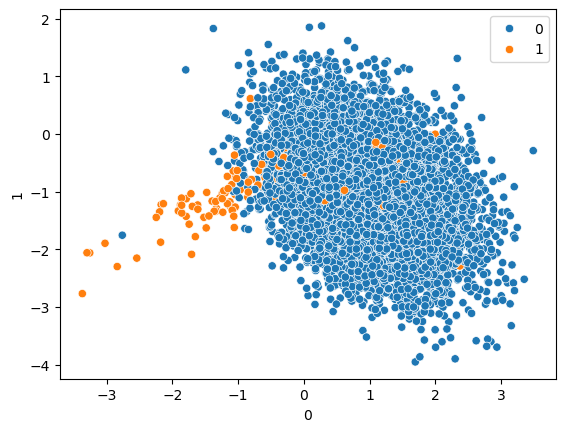

In [41]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [42]:
from sklearn.linear_model import LogisticRegression

In [44]:
model = LogisticRegression()
panelty = ['l1','l2','elasticnet']
c_vlaues = [100,10,1.0,0.1,0.01]
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky','sag','saga']
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [46]:
params = dict(penalty=panelty,C=c_vlaues,solver=solvers,class_weight=class_weight)

In [48]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [49]:
cv = StratifiedKFold()

In [50]:
grid_cv = GridSearchCV(estimator=model,param_grid=params,cv=cv,scoring='accuracy')

In [51]:
grid_cv.fit(x_train,y_train)

/Users/bhaskarrai/Desktop/100-days-/day_67/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/Users/bhaskarrai/Desktop/100-days-/day_67/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/Users/bhaskarrai/Desktop/100-days-/day_67/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


,estimator,LogisticRegression()
,param_grid,"{'C': [100, 10, ...], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [52]:
y_pred = grid_cv.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
print(score)

0.7033333333333334
